## AI Hack Tunisia - Fraud detection in Electricity and Gas consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)

In [149]:
def plot_dist_train_test(train,test,column,typee="bar"):
    fig,ax = plt.subplots(1,3,figsize=(15,4))

    if (typee=="bar"):
        sns.countplot(data=train,x=column ,ax=ax[0])
        sns.countplot(data=test,x=column ,ax=ax[1])
    elif (typee=="box"):
        sns.violinplot(data=train,x="target",y=column,ax=ax[0])
        sns.violinplot(data=test,y=column,ax=ax[1])
    elif (typee=="dist"):
        sns.distplot(train[column],ax=ax[0])
        sns.distplot(test[column],ax=ax[1])

    plt.tight_layout()

In [3]:
train_client = pd.read_csv("./train/client_train.csv")
train_invoice = pd.read_csv("./train/invoice_train.csv")

test_client = pd.read_csv("./test/client_test.csv")
test_invoice = pd.read_csv("./test/invoice_test.csv")

C:\Users\Justpro\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### We have a class inbalance problem :

In [98]:
train_client.target.value_counts(normalize=True)

0.0    0.944159
1.0    0.055841
Name: target, dtype: float64

In [4]:
train_client.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


### Plotting the distribution of certain columns in the train and the test set :

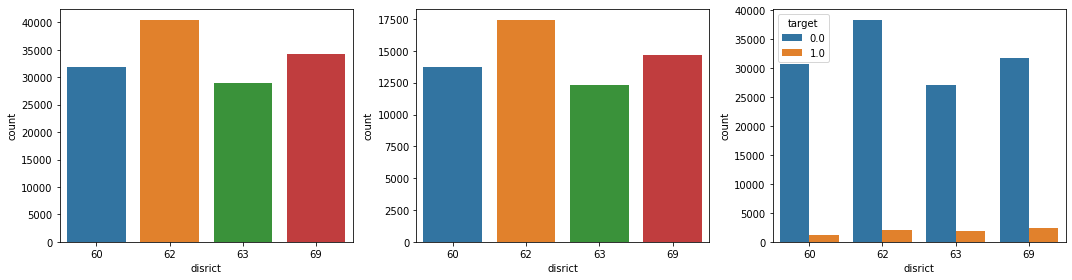

In [43]:
plot_dist_train_test(train_client,test_client,"disrict",typee="bar")

In [52]:
train_client.groupby("disrict")["target"].mean()

disrict
60    0.035869
62    0.051619
63    0.065236
69    0.071485
Name: target, dtype: float64

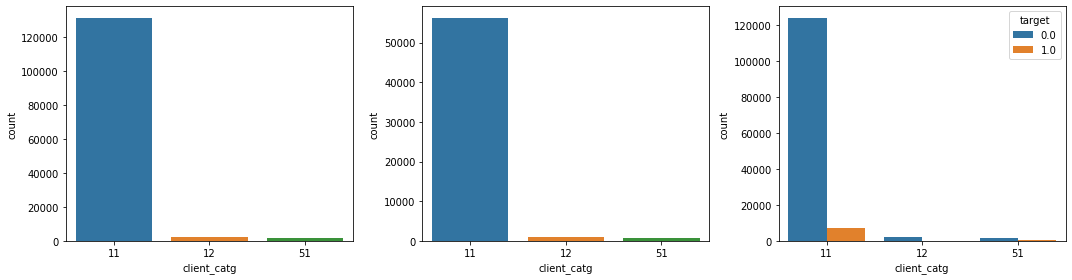

In [45]:
plot_dist_train_test(train_client,test_client,"client_catg",typee="bar")

In [51]:
train_client.groupby("client_catg")["target"].mean()

client_catg
11    0.054687
12    0.039638
51    0.168653
Name: target, dtype: float64

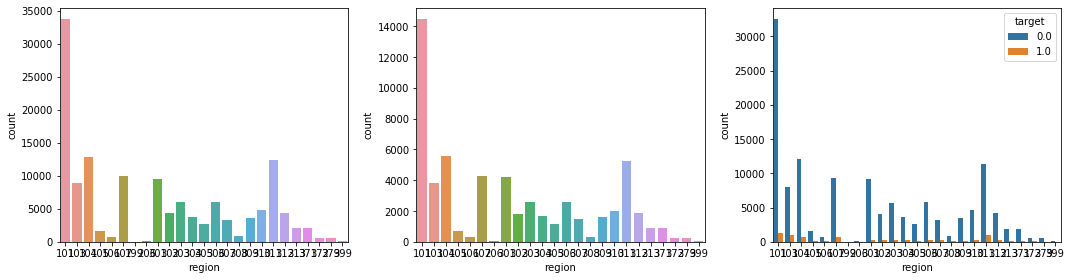

In [53]:
plot_dist_train_test(train_client,test_client,"region",typee="bar")

#### Train and test sets distribution are pretty similar in terms of distributions of most columns 

In [70]:
train_client.region.unique()

array([101, 107, 301, 105, 303, 103, 309, 311, 304, 104, 312, 305, 306,
       308, 372, 307, 313, 310, 371, 302, 106, 379, 399, 206, 199],
      dtype=int64)

In [82]:
test_client.region.unique()

array([307, 103, 310, 101, 301, 304, 303, 104, 309, 107, 302, 105, 311,
       312, 306, 106, 305, 313, 308, 371, 372, 379, 399, 206], dtype=int64)

In [84]:
np.isin(train_client.region.unique(),test_client.region.unique())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

#### Region 199 exists only in the train set

In [85]:
train_client[train_client.region == 199]

,disrict,client_id,client_catg,region,creation_date,target
91886,60,train_Client_60751,11,199,31/10/2009,0.0
128146,60,train_Client_93386,11,199,31/10/2009,0.0


In [86]:
train_invoice[train_invoice.client_id == "train_Client_60751"]

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
3032766,train_Client_60751,2009-10-11,40,6973883,1,5,6,1,0,0,0,0,0,0,2,GAZ


In [88]:
train_invoice[train_invoice.client_id == "train_Client_93386"]

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
4234108,train_Client_93386,2009-10-11,40,6973878,1,5,6,1,0,0,0,0,0,0,2,GAZ


#### Creating useful features from the date :

In [9]:
train_client["day"] = train_client.creation_date.apply(lambda x : str(x).split("/")[0])
train_client["month"] = train_client.creation_date.apply(lambda x : str(x).split("/")[1])
train_client["year"] = train_client.creation_date.apply(lambda x : str(x).split("/")[2])

test_client["day"] = test_client.creation_date.apply(lambda x : str(x).split("/")[0])
test_client["month"] = test_client.creation_date.apply(lambda x : str(x).split("/")[1])
test_client["year"] = test_client.creation_date.apply(lambda x : str(x).split("/")[2])

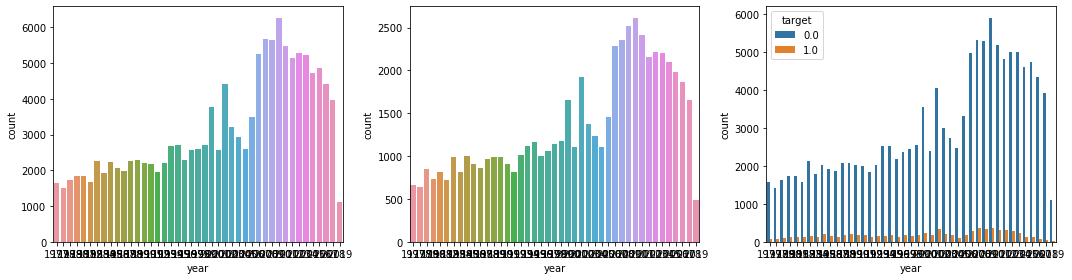

In [107]:
plot_dist_train_test(train_client,test_client,"year",typee="bar")

In [99]:
train_invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


#### Some columns contain many rare categories :

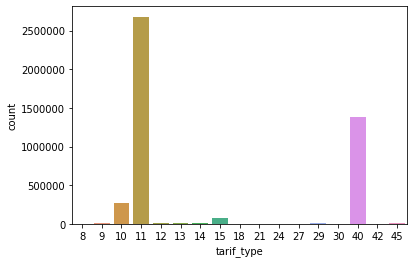

In [111]:
sns.countplot(data=train_invoice,x="tarif_type")

### The aggregation for categorical features are mainly made with :
    *Getting the unique values of the column for each specific client
    *Getting the most popular value of the column for each specific client
    *Getting the number of unique values of the column for each specific client 

In [10]:
tarif_type_unique= train_invoice.groupby("client_id")["tarif_type"].unique()
train_client["tarif_type"]= train_client["client_id"].map(tarif_type_unique)
train_client["tarif_type"] = train_client["tarif_type"].astype(str)

In [19]:
tarif_type_unique= test_invoice.groupby("client_id")["tarif_type"].unique()
test_client["tarif_type"]= test_client["client_id"].map(tarif_type_unique)
test_client["tarif_type"] = test_client["tarif_type"].astype(str)

In [ ]:
df_tarif_train = pd.DataFrame(train_invoice.groupby("client_id")["tarif_type"].value_counts())
df_tarif_train.columns = ["count"]
df_tarif_train = df_tarif_train.reset_index()
df_tarif_t1 = pd.DataFrame(df_tarif_train.groupby(["client_id"])["count"].max()).reset_index()
df_tarif_train2 = df_tarif_train.drop_duplicates(subset=["client_id","count"])
df_tarif_t1 = df_tarif_t1.merge(df_tarif_train2,how="left",on=["client_id","count"])
df_tarif_t1 = df_tarif_t1[["client_id","tarif_type"]]
df_tarif_t1 = df_tarif_t1.set_index("client_id")
train_client["tarif_type_pop"] = train_client.client_id.map(df_tarif_t1.tarif_type)

In [118]:
df_tarif_train = pd.DataFrame(test_invoice.groupby("client_id")["tarif_type"].value_counts())
df_tarif_train.columns = ["count"]
df_tarif_train = df_tarif_train.reset_index()
df_tarif_t1 = pd.DataFrame(df_tarif_train.groupby(["client_id"])["count"].max()).reset_index()
df_tarif_train2 = df_tarif_train.drop_duplicates(subset=["client_id","count"])
df_tarif_t1 = df_tarif_t1.merge(df_tarif_train2,how="left",on=["client_id","count"])
df_tarif_t1 = df_tarif_t1[["client_id","tarif_type"]]
df_tarif_t1 = df_tarif_t1.set_index("client_id")
test_client["tarif_type_pop"] = test_client.client_id.map(df_tarif_t1.tarif_type)

In [123]:
train_client["count_factures"] = train_client.client_id.map(train_invoice.groupby("client_id")["invoice_date"].count())
test_client["count_factures"] = test_client.client_id.map(test_invoice.groupby("client_id")["invoice_date"].count())

In [139]:
train_client["count_tarif_type"] = train_client.tarif_type.apply(lambda x : len(x.split(" ")))
test_client["count_tarif_type"] = test_client.tarif_type.apply(lambda x : len(x.split(" ")))

In [141]:
train_invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
train_client["count_counter_number"] = train_client.client_id.map(train_invoice.groupby("client_id")["counter_number"].nunique())
test_client["count_counter_number"] = test_client.client_id.map(test_invoice.groupby("client_id")["counter_number"].nunique())

In [148]:
train_invoice.counter_statue.nunique()

16

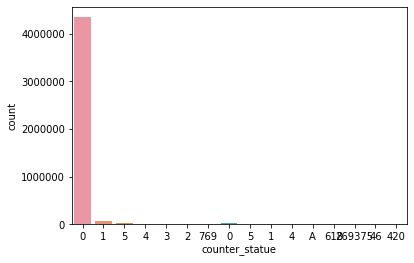

In [152]:
sns.countplot(data=train_invoice,x="counter_statue")

In [155]:
counter_statue_unique= train_invoice.groupby("client_id")["counter_statue"].unique()
train_client["counter_statue"]= train_client["client_id"].map(counter_statue_unique)
train_client["counter_statue"] = train_client["counter_statue"].astype(str)

In [157]:
counter_statue_unique= test_invoice.groupby("client_id")["counter_statue"].unique()
test_client["counter_statue"]= test_client["client_id"].map(counter_statue_unique)
test_client["counter_statue"] = test_client["counter_statue"].astype(str)

In [162]:
train_client["count_counter_statue"] = train_client.client_id.map(train_invoice.groupby("client_id")["counter_statue"].nunique())
test_client["count_counter_statue"] = test_client.client_id.map(test_invoice.groupby("client_id")["counter_statue"].nunique())

In [179]:
df_tarif_train = pd.DataFrame(train_invoice.groupby("client_id")["counter_statue"].value_counts())
df_tarif_train.columns = ["count"]
df_tarif_train = df_tarif_train.reset_index()
df_tarif_train["counter_statue"] = df_tarif_train.counter_statue.astype(str)
df_tarif_t1 = pd.DataFrame(df_tarif_train.groupby(["client_id"])["count"].max()).reset_index()
df_tarif_train2 = df_tarif_train.drop_duplicates(subset=["client_id","count"])
df_tarif_t1 = df_tarif_t1.merge(df_tarif_train2,how="left",on=["client_id","count"])
df_tarif_t1 = df_tarif_t1[["client_id","counter_statue"]]
df_tarif_t1 = df_tarif_t1.set_index("client_id")
train_client["counter_statue_pop"] = train_client.client_id.map(df_tarif_t1.counter_statue)

In [182]:
df_tarif_train = pd.DataFrame(test_invoice.groupby("client_id")["counter_statue"].value_counts())
df_tarif_train.columns = ["count"]
df_tarif_train = df_tarif_train.reset_index()
df_tarif_train["counter_statue"] = df_tarif_train.counter_statue.astype(str)
df_tarif_t1 = pd.DataFrame(df_tarif_train.groupby(["client_id"])["count"].max()).reset_index()
df_tarif_train2 = df_tarif_train.drop_duplicates(subset=["client_id","count"])
df_tarif_t1 = df_tarif_t1.merge(df_tarif_train2,how="left",on=["client_id","count"])
df_tarif_t1 = df_tarif_t1[["client_id","counter_statue"]]
df_tarif_t1 = df_tarif_t1.set_index("client_id")
test_client["counter_statue_pop"] = test_client.client_id.map(df_tarif_t1.counter_statue)

In [186]:
counter_code_unique= train_invoice.groupby("client_id")["counter_code"].unique()
train_client["counter_code"]= train_client["client_id"].map(counter_code_unique)
train_client["counter_code"] = train_client["counter_code"].astype(str)

In [188]:
counter_code_unique= test_invoice.groupby("client_id")["counter_code"].unique()
test_client["counter_code"]= test_client["client_id"].map(counter_code_unique)
test_client["counter_code"] = test_client["counter_code"].astype(str)

In [193]:
train_client["counter_counter_code"] = train_client.client_id.map(train_invoice.groupby("client_id")["counter_code"].nunique())
test_client["counter_counter_code"] = test_client.client_id.map(test_invoice.groupby("client_id")["counter_code"].nunique())

In [195]:
df_tarif_train = pd.DataFrame(train_invoice.groupby("client_id")["counter_code"].value_counts())
df_tarif_train.columns = ["count"]
df_tarif_train = df_tarif_train.reset_index()
df_tarif_train["counter_code"] = df_tarif_train.counter_code.astype(str)
df_tarif_t1 = pd.DataFrame(df_tarif_train.groupby(["client_id"])["count"].max()).reset_index()
df_tarif_train2 = df_tarif_train.drop_duplicates(subset=["client_id","count"])
df_tarif_t1 = df_tarif_t1.merge(df_tarif_train2,how="left",on=["client_id","count"])
df_tarif_t1 = df_tarif_t1[["client_id","counter_code"]]
df_tarif_t1 = df_tarif_t1.set_index("client_id")
train_client["counter_code_pop"] = train_client.client_id.map(df_tarif_t1.counter_code)

In [197]:
df_tarif_train = pd.DataFrame(test_invoice.groupby("client_id")["counter_code"].value_counts())
df_tarif_train.columns = ["count"]
df_tarif_train = df_tarif_train.reset_index()
df_tarif_train["counter_code"] = df_tarif_train.counter_code.astype(str)
df_tarif_t1 = pd.DataFrame(df_tarif_train.groupby(["client_id"])["count"].max()).reset_index()
df_tarif_train2 = df_tarif_train.drop_duplicates(subset=["client_id","count"])
df_tarif_t1 = df_tarif_t1.merge(df_tarif_train2,how="left",on=["client_id","count"])
df_tarif_t1 = df_tarif_t1[["client_id","counter_code"]]
df_tarif_t1 = df_tarif_t1.set_index("client_id")
test_client["counter_code_pop"] = test_client.client_id.map(df_tarif_t1.counter_code)

In [199]:
train_invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [201]:
reading_remarque_unique= train_invoice.groupby("client_id")["reading_remarque"].unique()
train_client["reading_remarque"]= train_client["client_id"].map(reading_remarque_unique)
train_client["reading_remarque"] = train_client["reading_remarque"].astype(str)

In [202]:
reading_remarque_unique= test_invoice.groupby("client_id")["reading_remarque"].unique()
test_client["reading_remarque"]= test_client["client_id"].map(reading_remarque_unique)
test_client["reading_remarque"] = test_client["reading_remarque"].astype(str)

In [207]:
train_client["counter_reading_remarque"] = train_client.client_id.map(train_invoice.groupby("client_id")["reading_remarque"].nunique())
test_client["counter_reading_remarque"] = test_client.client_id.map(test_invoice.groupby("client_id")["reading_remarque"].nunique())

In [209]:
df_tarif_train = pd.DataFrame(train_invoice.groupby("client_id")["reading_remarque"].value_counts())
df_tarif_train.columns = ["count"]
df_tarif_train = df_tarif_train.reset_index()
df_tarif_train["reading_remarque"] = df_tarif_train.reading_remarque.astype(str)
df_tarif_t1 = pd.DataFrame(df_tarif_train.groupby(["client_id"])["count"].max()).reset_index()
df_tarif_train2 = df_tarif_train.drop_duplicates(subset=["client_id","count"])
df_tarif_t1 = df_tarif_t1.merge(df_tarif_train2,how="left",on=["client_id","count"])
df_tarif_t1 = df_tarif_t1[["client_id","reading_remarque"]]
df_tarif_t1 = df_tarif_t1.set_index("client_id")
train_client["reading_remarque_pop"] = train_client.client_id.map(df_tarif_t1.reading_remarque)

In [211]:
df_tarif_train = pd.DataFrame(test_invoice.groupby("client_id")["reading_remarque"].value_counts())
df_tarif_train.columns = ["count"]
df_tarif_train = df_tarif_train.reset_index()
df_tarif_train["reading_remarque"] = df_tarif_train.reading_remarque.astype(str)
df_tarif_t1 = pd.DataFrame(df_tarif_train.groupby(["client_id"])["count"].max()).reset_index()
df_tarif_train2 = df_tarif_train.drop_duplicates(subset=["client_id","count"])
df_tarif_t1 = df_tarif_t1.merge(df_tarif_train2,how="left",on=["client_id","count"])
df_tarif_t1 = df_tarif_t1[["client_id","reading_remarque"]]
df_tarif_t1 = df_tarif_t1.set_index("client_id")
test_client["reading_remarque_pop"] = test_client.client_id.map(df_tarif_t1.reading_remarque)

In [351]:
counter_type_unique= train_invoice.groupby("client_id")["counter_type"].unique()
train_client["counter_type"]= train_client["client_id"].map(counter_type_unique)
train_client["counter_type"] = train_client["counter_type"].astype(str)

In [352]:
counter_type_unique= test_invoice.groupby("client_id")["counter_type"].unique()
test_client["counter_type"]= test_client["client_id"].map(counter_type_unique)
test_client["counter_type"] = test_client["counter_type"].astype(str)

In [353]:
df_tarif_train = pd.DataFrame(train_invoice.groupby("client_id")["counter_type"].value_counts())
df_tarif_train.columns = ["count"]
df_tarif_train = df_tarif_train.reset_index()
df_tarif_t1 = pd.DataFrame(df_tarif_train.groupby(["client_id"])["count"].max()).reset_index()
df_tarif_train2 = df_tarif_train.drop_duplicates(subset=["client_id","count"])
df_tarif_t1 = df_tarif_t1.merge(df_tarif_train2,how="left",on=["client_id","count"])
df_tarif_t1 = df_tarif_t1[["client_id","counter_type"]]
df_tarif_t1 = df_tarif_t1.set_index("client_id")
train_client["counter_type_pop"] = train_client.client_id.map(df_tarif_t1.counter_type)

In [355]:
df_tarif_train = pd.DataFrame(test_invoice.groupby("client_id")["counter_type"].value_counts())
df_tarif_train.columns = ["count"]
df_tarif_train = df_tarif_train.reset_index()
df_tarif_t1 = pd.DataFrame(df_tarif_train.groupby(["client_id"])["count"].max()).reset_index()
df_tarif_train2 = df_tarif_train.drop_duplicates(subset=["client_id","count"])
df_tarif_t1 = df_tarif_t1.merge(df_tarif_train2,how="left",on=["client_id","count"])
df_tarif_t1 = df_tarif_t1[["client_id","counter_type"]]
df_tarif_t1 = df_tarif_t1.set_index("client_id")
test_client["counter_type_pop"] = test_client.client_id.map(df_tarif_t1.counter_type)

In [213]:
train_invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


#### Deleting 3 outliers in the consommation columns :

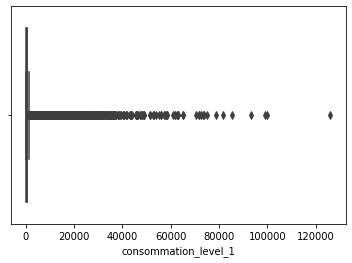

In [247]:
sns.boxplot(train_invoice.consommation_level_1)

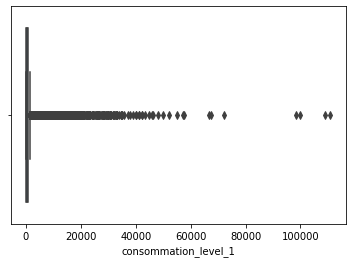

In [248]:
sns.boxplot(test_invoice.consommation_level_1)

In [232]:
train_invoice.consommation_level_1.idxmax()

2571808

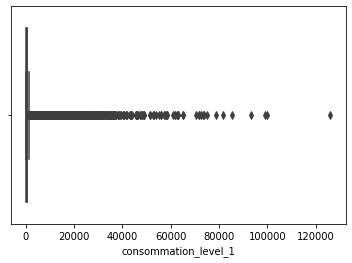

In [234]:
sns.boxplot(train_invoice.drop(train_invoice.consommation_level_1.idxmax(),axis=0).consommation_level_1)

In [237]:
train_invoice.iloc[train_invoice.consommation_level_1.idxmax(),:]

client_id               train_Client_48203
invoice_date                    2012-03-04
tarif_type                              45
counter_number                     5134460
counter_statue                           0
counter_code                            25
reading_remarque                         9
counter_coefficient                      1
consommation_level_1                999910
consommation_level_2                     0
consommation_level_3                     0
consommation_level_4                     0
old_index                           138660
new_index                           138570
months_number                            2
counter_type                           GAZ
Name: 2571808, dtype: object

In [238]:
train_invoice.drop(train_invoice.consommation_level_1.idxmax(),axis=0,inplace=True)
train_client.drop(train_client[train_client.client_id == "train_Client_48203"].index,axis=0,inplace=True)

KeyError: "['disrict' 'client_id' 'client_catg' 'region' 'creation_date' 'target'\n 'day' 'month' 'year' 'tarif_type' 'tarif_type_pop' 'count_factures'\n 'count_tarif_type' 'count_counter_number' 'counter_statue'\n 'count_counter_statue' 'counter_statue_pop' 'counter_code'\n 'counter_counter_code' 'counter_code_pop' 'reading_remarque'\n 'counter_reading_remarque' 'reading_remarque_pop'] not found in axis"

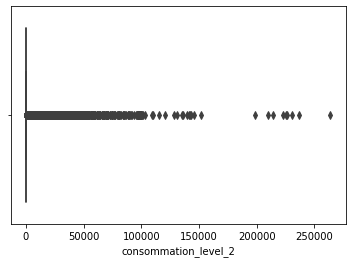

In [272]:
sns.boxplot(train_invoice.consommation_level_2)

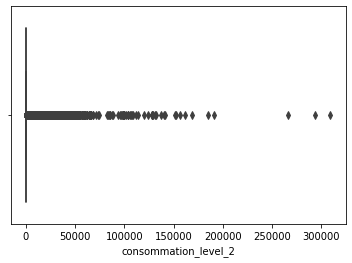

In [273]:
sns.boxplot(test_invoice.consommation_level_2)

In [ ]:
train_invoice.drop(train_invoice.consommation_level_1.idxmax(),axis=0,inplace=True)
train_client.drop(train_client[train_client.client_id == "train_Client_48203"].index,axis=0,inplace=True)

In [271]:
train_client.drop(train_client[train_client.client_id.isin(train_invoice_b[train_invoice_b.consommation_level_2>600000].client_id.values)].index,
                 axis=0,inplace=True)
train_invoice.drop(train_invoice[train_invoice.consommation_level_2>600000].index,axis=0,inplace=True)

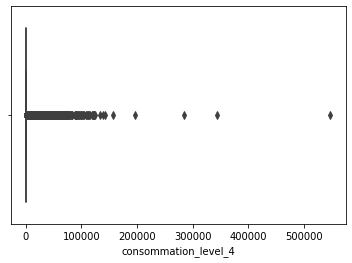

In [279]:
sns.boxplot(train_invoice.consommation_level_4)

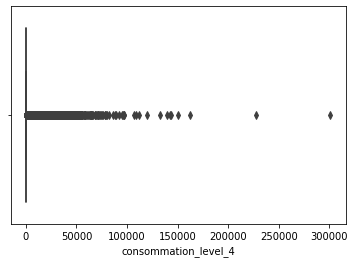

In [281]:
sns.boxplot(test_invoice.consommation_level_4)

In [283]:
train_client.drop(train_client[train_client.client_id.isin(train_invoice_b[train_invoice_b.consommation_level_4>500000].client_id.values)].index,
                 axis=0,inplace=True)
train_invoice.drop(train_invoice[train_invoice.consommation_level_4>500000].index,axis=0,inplace=True)

In [287]:
train_invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


### Creating a consommation column and a consommation_level column :

In [291]:
train_invoice["consommation"] = train_invoice["new_index"] - train_invoice["old_index"]
test_invoice["consommation"] = test_invoice["new_index"] - test_invoice["old_index"]

In [310]:
consommation_level = []
for d in train_invoice.values:
    if (d[11] != 0):
        consommation_level.append(4)
    elif (d[10] != 0):
        consommation_level.append(3)
    elif (d[9] != 0):
        consommation_level.append(2)
    elif (d[8] != 0):
        consommation_level.append(1)
    else:
        consommation_level.append(0)

train_invoice["consommation_level"] = consommation_level

In [312]:
consommation_level = []
for d in test_invoice.values:
    if (d[11] != 0):
        consommation_level.append(4)
    elif (d[10] != 0):
        consommation_level.append(3)
    elif (d[9] != 0):
        consommation_level.append(2)
    elif (d[8] != 0):
        consommation_level.append(1)
    else:
        consommation_level.append(0)

test_invoice["consommation_level"] = consommation_level

In [319]:
train_invoice.head(5)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,consommation,consommation_level
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC,82,1
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC,1384,2
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC,123,1
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC,102,1
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC,572,1


In [322]:
train_invoice[train_invoice["client_id"] == "train_Client_0"].consommation_level_1.min()

38

In [362]:
train_client.head()

,disrict,client_id,client_catg,region,creation_date,target,day,month,year,tarif_type,tarif_type_pop,count_factures,count_tarif_type,count_counter_number,counter_statue,count_counter_statue,counter_statue_pop,counter_code,counter_counter_code,counter_code_pop,reading_remarque,counter_reading_remarque,reading_remarque_pop,consommation_level_1_min,consommation_level_1_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_2_min,consommation_level_2_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_3_min,consommation_level_3_max,consommation_level_3_mean,consommation_level_3_std,consommation_level_4_min,consommation_level_4_max,consommation_level_4_mean,consommation_level_4_std,counter_type,counter_type_pop,consommation_min,consommation_max,consommation_mean,consommation_std,consommation_level_min,consommation_level_max,consommation_level_mean,consommation_level_std
0,60,train_Client_0,11,101,31/12/1994,0.0,31,12,1994,[11],11,35,1,1,[0],1,0,[203 207],2,203,[8 6 9],3,6,38,1200,352.400000,310.343472,0,186,10.571429,43.568935,0,0,0.000000,0.000000,0,0,0.000000,0.000000,['ELEC'],ELEC,38,1386,362.971429,341.553930,1,2,1.057143,0.235504
1,69,train_Client_1,11,107,29/05/2002,0.0,29,05,2002,[11],11,37,1,1,[0],1,0,[203],1,203,[8 6 9],3,6,190,1207,557.540541,197.935960,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,['ELEC'],ELEC,190,1207,557.540541,197.935960,1,1,1.000000,0.000000
2,62,train_Client_10,11,301,13/03/1986,0.0,13,03,1986,[11],11,18,1,1,[0],1,0,[203 207],2,203,[8 6 9],3,6,188,2400,798.611111,513.841374,0,682,37.888889,160.748942,0,0,0.000000,0.000000,0,0,0.000000,0.000000,['ELEC'],ELEC,188,3082,836.500000,646.808386,1,2,1.055556,0.235702
3,69,train_Client_100,11,105,11/07/1996,0.0,11,07,1996,[11],11,20,1,1,[0],1,0,[413],1,413,[6 9],2,6,0,15,1.200000,3.607011,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,['ELEC'],ELEC,0,15,1.200000,3.607011,0,1,0.200000,0.410391
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,10,2014,[11],11,14,1,1,[0],1,0,[207],1,207,[9 8],2,9,124,800,663.714286,224.831365,0,400,104.857143,167.155320,0,800,117.357143,289.433294,0,382,36.714286,105.421081,['ELEC'],ELEC,124,2382,922.642857,633.485669,1,4,1.714286,1.138729


Checkpoint

In [363]:
train_client.to_csv("train.csv",index=False)
test_client.to_csv("test.csv",index=False)

In [365]:
train_client.head()

,disrict,client_id,client_catg,region,creation_date,target,day,month,year,tarif_type,tarif_type_pop,count_factures,count_tarif_type,count_counter_number,counter_statue,count_counter_statue,counter_statue_pop,counter_code,counter_counter_code,counter_code_pop,reading_remarque,counter_reading_remarque,reading_remarque_pop,consommation_level_1_min,consommation_level_1_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_2_min,consommation_level_2_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_3_min,consommation_level_3_max,consommation_level_3_mean,consommation_level_3_std,consommation_level_4_min,consommation_level_4_max,consommation_level_4_mean,consommation_level_4_std,counter_type,counter_type_pop,consommation_min,consommation_max,consommation_mean,consommation_std,consommation_level_min,consommation_level_max,consommation_level_mean,consommation_level_std
0,60,train_Client_0,11,101,31/12/1994,0.0,31,12,1994,[11],11,35,1,1,[0],1,0,[203 207],2,203,[8 6 9],3,6,38,1200,352.400000,310.343472,0,186,10.571429,43.568935,0,0,0.000000,0.000000,0,0,0.000000,0.000000,['ELEC'],ELEC,38,1386,362.971429,341.553930,1,2,1.057143,0.235504
1,69,train_Client_1,11,107,29/05/2002,0.0,29,05,2002,[11],11,37,1,1,[0],1,0,[203],1,203,[8 6 9],3,6,190,1207,557.540541,197.935960,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,['ELEC'],ELEC,190,1207,557.540541,197.935960,1,1,1.000000,0.000000
2,62,train_Client_10,11,301,13/03/1986,0.0,13,03,1986,[11],11,18,1,1,[0],1,0,[203 207],2,203,[8 6 9],3,6,188,2400,798.611111,513.841374,0,682,37.888889,160.748942,0,0,0.000000,0.000000,0,0,0.000000,0.000000,['ELEC'],ELEC,188,3082,836.500000,646.808386,1,2,1.055556,0.235702
3,69,train_Client_100,11,105,11/07/1996,0.0,11,07,1996,[11],11,20,1,1,[0],1,0,[413],1,413,[6 9],2,6,0,15,1.200000,3.607011,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,['ELEC'],ELEC,0,15,1.200000,3.607011,0,1,0.200000,0.410391
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,10,2014,[11],11,14,1,1,[0],1,0,[207],1,207,[9 8],2,9,124,800,663.714286,224.831365,0,400,104.857143,167.155320,0,800,117.357143,289.433294,0,382,36.714286,105.421081,['ELEC'],ELEC,124,2382,922.642857,633.485669,1,4,1.714286,1.138729


In [377]:
train_client["tarif_type"] = train_client.tarif_type.apply(lambda x : x[1:-1])
train_client["tarif_type"] = train_client.tarif_type.apply(lambda x : np.sort(x.split(" ")))
train_client["tarif_type"] = train_client.tarif_type.apply(lambda x : np.sort(x))
train_client["tarif_type"] = train_client["tarif_type"].astype(str)
train_client["tarif_type"] = train_client.tarif_type.apply(lambda x : x.replace("'' ",""))

test_client["tarif_type"] = test_client.tarif_type.apply(lambda x : x[1:-1])
test_client["tarif_type"] = test_client.tarif_type.apply(lambda x : np.sort(x.split(" ")))
test_client["tarif_type"] = test_client.tarif_type.apply(lambda x : np.sort(x))
test_client["tarif_type"] = test_client["tarif_type"].astype(str)
test_client["tarif_type"] = test_client.tarif_type.apply(lambda x : x.replace("'' ",""))

In [408]:
train_client["counter_statue"] = train_client.counter_statue.apply(lambda x : x[1:-1])
train_client["counter_statue"] = train_client.counter_statue.apply(lambda x : np.sort(x.split(" ")))
train_client["counter_statue"] = train_client.counter_statue.apply(lambda x : np.sort(x))
train_client["counter_statue"] = train_client["counter_statue"].astype(str)
train_client["counter_statue"] = train_client.counter_statue.apply(lambda x : x.replace("'' ",""))

test_client["counter_statue"] = test_client.counter_statue.apply(lambda x : x[1:-1])
test_client["counter_statue"] = test_client.counter_statue.apply(lambda x : np.sort(x.split(" ")))
test_client["counter_statue"] = test_client.counter_statue.apply(lambda x : np.sort(x))
test_client["counter_statue"] = test_client["counter_statue"].astype(str)
test_client["counter_statue"] = test_client.counter_statue.apply(lambda x : x.replace("'' ",""))

In [411]:
train_client["counter_code"] = train_client.counter_code.apply(lambda x : x[1:-1])
train_client["counter_code"] = train_client.counter_code.apply(lambda x : np.sort(x.split(" ")))
train_client["counter_code"] = train_client.counter_code.apply(lambda x : np.sort(x))
train_client["counter_code"] = train_client["counter_code"].astype(str)
train_client["counter_code"] = train_client.counter_code.apply(lambda x : x.replace("'' ",""))

test_client["counter_code"] = test_client.counter_code.apply(lambda x : x[1:-1])
test_client["counter_code"] = test_client.counter_code.apply(lambda x : np.sort(x.split(" ")))
test_client["counter_code"] = test_client.counter_code.apply(lambda x : np.sort(x))
test_client["counter_code"] = test_client["counter_code"].astype(str)
test_client["counter_code"] = test_client.counter_code.apply(lambda x : x.replace("'' ",""))

In [412]:
train_client["reading_remarque"] = train_client.reading_remarque.apply(lambda x : x[1:-1])
train_client["reading_remarque"] = train_client.reading_remarque.apply(lambda x : np.sort(x.split(" ")))
train_client["reading_remarque"] = train_client.reading_remarque.apply(lambda x : np.sort(x))
train_client["reading_remarque"] = train_client["reading_remarque"].astype(str)
train_client["reading_remarque"] = train_client.reading_remarque.apply(lambda x : x.replace("'' ",""))

test_client["reading_remarque"] = test_client.reading_remarque.apply(lambda x : x[1:-1])
test_client["reading_remarque"] = test_client.reading_remarque.apply(lambda x : np.sort(x.split(" ")))
test_client["reading_remarque"] = test_client.reading_remarque.apply(lambda x : np.sort(x))
test_client["reading_remarque"] = test_client["reading_remarque"].astype(str)
test_client["reading_remarque"] = test_client.reading_remarque.apply(lambda x : x.replace("'' ",""))

In [413]:
train_client["counter_type"] = train_client.counter_type.apply(lambda x : x[1:-1])
train_client["counter_type"] = train_client.counter_type.apply(lambda x : np.sort(x.split(" ")))
train_client["counter_type"] = train_client.counter_type.apply(lambda x : np.sort(x))
train_client["counter_type"] = train_client["counter_type"].astype(str)
train_client["counter_type"] = train_client.counter_type.apply(lambda x : x.replace("'' ",""))

test_client["counter_type"] = test_client.counter_type.apply(lambda x : x[1:-1])
test_client["counter_type"] = test_client.counter_type.apply(lambda x : np.sort(x.split(" ")))
test_client["counter_type"] = test_client.counter_type.apply(lambda x : np.sort(x))
test_client["counter_type"] = test_client["counter_type"].astype(str)
test_client["counter_type"] = test_client.counter_type.apply(lambda x : x.replace("'' ",""))

In [415]:
train_client.to_csv("train1.csv",index=False)
test_client.to_csv("test1.csv",index=False)

In [416]:
train_client.head()

,disrict,client_id,client_catg,region,creation_date,target,day,month,year,tarif_type,tarif_type_pop,count_factures,count_tarif_type,count_counter_number,counter_statue,count_counter_statue,counter_statue_pop,counter_code,counter_counter_code,counter_code_pop,reading_remarque,counter_reading_remarque,reading_remarque_pop,consommation_level_1_min,consommation_level_1_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_2_min,consommation_level_2_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_3_min,consommation_level_3_max,consommation_level_3_mean,consommation_level_3_std,consommation_level_4_min,consommation_level_4_max,consommation_level_4_mean,consommation_level_4_std,counter_type,counter_type_pop,consommation_min,consommation_max,consommation_mean,consommation_std,consommation_level_min,consommation_level_max,consommation_level_mean,consommation_level_std
0,60,train_Client_0,11,101,31/12/1994,0.0,31,12,1994,['11'],11,35,1,1,['0'],1,0,['203' '207'],2,203,['6' '8' '9'],3,6,38,1200,352.400000,310.343472,0,186,10.571429,43.568935,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,38,1386,362.971429,341.553930,1,2,1.057143,0.235504
1,69,train_Client_1,11,107,29/05/2002,0.0,29,05,2002,['11'],11,37,1,1,['0'],1,0,['203'],1,203,['6' '8' '9'],3,6,190,1207,557.540541,197.935960,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,190,1207,557.540541,197.935960,1,1,1.000000,0.000000
2,62,train_Client_10,11,301,13/03/1986,0.0,13,03,1986,['11'],11,18,1,1,['0'],1,0,['203' '207'],2,203,['6' '8' '9'],3,6,188,2400,798.611111,513.841374,0,682,37.888889,160.748942,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,188,3082,836.500000,646.808386,1,2,1.055556,0.235702
3,69,train_Client_100,11,105,11/07/1996,0.0,11,07,1996,['11'],11,20,1,1,['0'],1,0,['413'],1,413,['6' '9'],2,6,0,15,1.200000,3.607011,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,0,15,1.200000,3.607011,0,1,0.200000,0.410391
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,10,2014,['11'],11,14,1,1,['0'],1,0,['207'],1,207,['8' '9'],2,9,124,800,663.714286,224.831365,0,400,104.857143,167.155320,0,800,117.357143,289.433294,0,382,36.714286,105.421081,"[""'ELEC'""]",ELEC,124,2382,922.642857,633.485669,1,4,1.714286,1.138729


In [1073]:
cat_cols = ["disrict","client_catg","region","tarif_type","tarif_type_pop","counter_statue","counter_statue_pop","counter_code","counter_code_pop","reading_remarque"
            ,"reading_remarque_pop","counter_type","counter_type_pop"]

In [422]:
train_client[cat_cols] = train_client[cat_cols].astype("category")
train_client["year"] = train_client["year"].astype(int)
train_client["day"] = train_client["day"].astype(int)
train_client["month"] = train_client["month"].astype(int)

test_client[cat_cols] = test_client[cat_cols].astype("category")
test_client["year"] = test_client["year"].astype(int)
test_client["day"] = test_client["day"].astype(int)
test_client["month"] = test_client["month"].astype(int)

In [425]:
train_client.head()

,disrict,client_id,client_catg,region,creation_date,target,day,month,year,tarif_type,tarif_type_pop,count_factures,count_tarif_type,count_counter_number,counter_statue,count_counter_statue,counter_statue_pop,counter_code,counter_counter_code,counter_code_pop,reading_remarque,counter_reading_remarque,reading_remarque_pop,consommation_level_1_min,consommation_level_1_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_2_min,consommation_level_2_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_3_min,consommation_level_3_max,consommation_level_3_mean,consommation_level_3_std,consommation_level_4_min,consommation_level_4_max,consommation_level_4_mean,consommation_level_4_std,counter_type,counter_type_pop,consommation_min,consommation_max,consommation_mean,consommation_std,consommation_level_min,consommation_level_max,consommation_level_mean,consommation_level_std
0,60,train_Client_0,11,101,31/12/1994,0.0,31,12,1994,['11'],11,35,1,1,['0'],1,0,['203' '207'],2,203,['6' '8' '9'],3,6,38,1200,352.400000,310.343472,0,186,10.571429,43.568935,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,38,1386,362.971429,341.553930,1,2,1.057143,0.235504
1,69,train_Client_1,11,107,29/05/2002,0.0,29,5,2002,['11'],11,37,1,1,['0'],1,0,['203'],1,203,['6' '8' '9'],3,6,190,1207,557.540541,197.935960,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,190,1207,557.540541,197.935960,1,1,1.000000,0.000000
2,62,train_Client_10,11,301,13/03/1986,0.0,13,3,1986,['11'],11,18,1,1,['0'],1,0,['203' '207'],2,203,['6' '8' '9'],3,6,188,2400,798.611111,513.841374,0,682,37.888889,160.748942,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,188,3082,836.500000,646.808386,1,2,1.055556,0.235702
3,69,train_Client_100,11,105,11/07/1996,0.0,11,7,1996,['11'],11,20,1,1,['0'],1,0,['413'],1,413,['6' '9'],2,6,0,15,1.200000,3.607011,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,0,15,1.200000,3.607011,0,1,0.200000,0.410391
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,10,2014,['11'],11,14,1,1,['0'],1,0,['207'],1,207,['8' '9'],2,9,124,800,663.714286,224.831365,0,400,104.857143,167.155320,0,800,117.357143,289.433294,0,382,36.714286,105.421081,"[""'ELEC'""]",ELEC,124,2382,922.642857,633.485669,1,4,1.714286,1.138729


In [573]:
train_client.to_csv("train1.csv",index=False)
test_client.to_csv("test1.csv",index=False)

In [850]:
train_client = pd.read_csv("train1.csv")
test_client = pd.read_csv("test1.csv")

train_client[cat_cols] = train_client[cat_cols].astype("category")
test_client[cat_cols] = test_client[cat_cols].astype("category")

In [874]:
train_client.head()

,disrict,client_id,client_catg,region,creation_date,target,day,month,year,tarif_type,tarif_type_pop,count_factures,count_tarif_type,count_counter_number,counter_statue,count_counter_statue,counter_statue_pop,counter_code,counter_counter_code,counter_code_pop,reading_remarque,counter_reading_remarque,reading_remarque_pop,consommation_level_1_min,consommation_level_1_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_2_min,consommation_level_2_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_3_min,consommation_level_3_max,consommation_level_3_mean,consommation_level_3_std,consommation_level_4_min,consommation_level_4_max,consommation_level_4_mean,consommation_level_4_std,counter_type,counter_type_pop,consommation_min,consommation_max,consommation_mean,consommation_std,consommation_level_min,consommation_level_max,consommation_level_mean,consommation_level_std
0,60,train_Client_0,11,101,31/12/1994,0.0,31,12,1994,['11'],11,35,1,1,['0'],1,0,['203' '207'],2,203,['6' '8' '9'],3,6,38,1200,352.400000,310.343472,0,186,10.571429,43.568935,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,38,1386,362.971429,341.553930,1,2,1.057143,0.235504
1,69,train_Client_1,11,107,29/05/2002,0.0,29,5,2002,['11'],11,37,1,1,['0'],1,0,['203'],1,203,['6' '8' '9'],3,6,190,1207,557.540541,197.935960,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,190,1207,557.540541,197.935960,1,1,1.000000,0.000000
2,62,train_Client_10,11,301,13/03/1986,0.0,13,3,1986,['11'],11,18,1,1,['0'],1,0,['203' '207'],2,203,['6' '8' '9'],3,6,188,2400,798.611111,513.841374,0,682,37.888889,160.748942,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,188,3082,836.500000,646.808386,1,2,1.055556,0.235702
3,69,train_Client_100,11,105,11/07/1996,0.0,11,7,1996,['11'],11,20,1,1,['0'],1,0,['413'],1,413,['6' '9'],2,6,0,15,1.200000,3.607011,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,"[""'ELEC'""]",ELEC,0,15,1.200000,3.607011,0,1,0.200000,0.410391
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,10,2014,['11'],11,14,1,1,['0'],1,0,['207'],1,207,['8' '9'],2,9,124,800,663.714286,224.831365,0,400,104.857143,167.155320,0,800,117.357143,289.433294,0,382,36.714286,105.421081,"[""'ELEC'""]",ELEC,124,2382,922.642857,633.485669,1,4,1.714286,1.138729


#### To_other function that regroups rare categories with a certain threshhold :

In [853]:
def to_other(train,test,column,treshhold):
    to_group_addr2 = (train[column].value_counts()<treshhold)[(train[column].value_counts()<treshhold)]
    train[column] = train[column].astype("category")
    test[column] = test[column].astype("category")
    train[column] = train[column].apply(lambda x : "other" if x in to_group_addr2 else x)
    test[column] = test[column].apply(lambda x : "other" if x in to_group_addr2 else x)
    return train,test

In [854]:
train_client,test_client = to_other(train_client,test_client,"tarif_type",50)

In [855]:
train_client,test_client = to_other(train_client,test_client,"tarif_type_pop",10)

In [856]:
train_client,test_client = to_other(train_client,test_client,"counter_statue",70)

In [857]:
train_client,test_client = to_other(train_client,test_client,"counter_statue_pop",200)

In [858]:
train_client,test_client = to_other(train_client,test_client,"counter_code",100)

In [859]:
train_client,test_client = to_other(train_client,test_client,"counter_code_pop",50)

In [860]:
train_client,test_client = to_other(train_client,test_client,"reading_remarque",10)

In [861]:
train_client,test_client = to_other(train_client,test_client,"reading_remarque_pop",150)

In [889]:
train_client.to_csv("train1.csv",index=False)
test_client.to_csv("test1.csv",index=False)

In [1094]:
train_client = pd.read_csv("train1.csv")
test_client = pd.read_csv("test1.csv")

train_client[cat_cols] = train_client[cat_cols].astype("category")
test_client[cat_cols] = test_client[cat_cols].astype("category")

C:\Users\Justpro\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1098]:
#train_client.drop(train_client.columns[23:39],axis=1,inplace=True)
#test_client.drop(test_client.columns[22:38],axis=1,inplace=True)

### The aggregation for the numerical columns is mainly made with :
    *Min
    *Max
    *Mean
    *Std

In [1099]:
cc = train_invoice[train_invoice.counter_type == "ELEC"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].min()
cc.columns = ["min_"+x+"_ELEC" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
train_client = train_client.merge(cc,how="left",on="client_id")

cc = train_invoice[train_invoice.counter_type == "ELEC"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].max()
cc.columns = ["max_"+x+"_ELEC" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
train_client = train_client.merge(cc,how="left",on="client_id")

cc = train_invoice[train_invoice.counter_type == "ELEC"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].mean()
cc.columns = ["mean_"+x+"_ELEC" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
train_client = train_client.merge(cc,how="left",on="client_id")

cc = train_invoice[train_invoice.counter_type == "ELEC"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].std()
cc.columns = ["std_"+x+"_ELEC" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
train_client = train_client.merge(cc,how="left",on="client_id")

#////////////////

cc = train_invoice[train_invoice.counter_type == "GAZ"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].min()
cc.columns = ["min_"+x+"_GAZ" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
train_client = train_client.merge(cc,how="left",on="client_id")

cc = train_invoice[train_invoice.counter_type == "GAZ"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].max()
cc.columns = ["max_"+x+"_GAZ" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
train_client = train_client.merge(cc,how="left",on="client_id")

cc = train_invoice[train_invoice.counter_type == "GAZ"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].mean()
cc.columns = ["mean_"+x+"_GAZ" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
train_client = train_client.merge(cc,how="left",on="client_id")

cc = train_invoice[train_invoice.counter_type == "GAZ"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].std()
cc.columns = ["std_"+x+"_GAZ" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
train_client = train_client.merge(cc,how="left",on="client_id")

In [1100]:
train_client[train_client.columns[33:]] = train_client[train_client.columns[33:]].fillna(0)

In [1101]:
cc = test_invoice[test_invoice.counter_type == "ELEC"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].min()
cc.columns = ["min_"+x+"_ELEC" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
test_client = test_client.merge(cc,how="left",on="client_id")

cc = test_invoice[test_invoice.counter_type == "ELEC"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].max()
cc.columns = ["max_"+x+"_ELEC" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
test_client = test_client.merge(cc,how="left",on="client_id")

cc = test_invoice[test_invoice.counter_type == "ELEC"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].mean()
cc.columns = ["mean_"+x+"_ELEC" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
test_client = test_client.merge(cc,how="left",on="client_id")

cc = test_invoice[test_invoice.counter_type == "ELEC"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].std()
cc.columns = ["std_"+x+"_ELEC" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
test_client = test_client.merge(cc,how="left",on="client_id")

#////////////////

cc = test_invoice[test_invoice.counter_type == "GAZ"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].min()
cc.columns = ["min_"+x+"_GAZ" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
test_client = test_client.merge(cc,how="left",on="client_id")

cc = test_invoice[test_invoice.counter_type == "GAZ"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].max()
cc.columns = ["max_"+x+"_GAZ" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
test_client = test_client.merge(cc,how="left",on="client_id")

cc = test_invoice[test_invoice.counter_type == "GAZ"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].mean()
cc.columns = ["mean_"+x+"_GAZ" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
test_client = test_client.merge(cc,how="left",on="client_id")

cc = test_invoice[test_invoice.counter_type == "GAZ"].groupby(["client_id"])[["consommation_level_1"
                                        ,"consommation_level_2","consommation_level_3"
                                       ,"consommation_level_4","consommation"]].std()
cc.columns = ["std_"+x+"_GAZ" for x in ['consommation_level_1', 'consommation_level_2','consommation_level_3', 'consommation_level_4', 'consommation']]
cc = cc.reset_index()
test_client = test_client.merge(cc,how="left",on="client_id")

In [1102]:
test_client[test_client.columns[33:]] = test_client[test_client.columns[33:]].fillna(0)

In [ ]:
train_client.head()

#### Mean and std encoding function :

In [1289]:
def mean_std_encode(train,test,column,target):
    train[column+"_mean_enc"] = train[column].map(train.groupby(column)[target].mean())
    train[column+"_std_enc"] = train[column].map(train.groupby(column)[target].std())
    test[column+"_mean_enc"] = test[column].map(train.groupby(column)[target].mean())
    test[column+"_std_enc"] = test[column].map(train.groupby(column)[target].std())
    return train,test

In [1286]:
train_client.head()

,disrict,client_id,client_catg,region,creation_date,target,day,month,year,tarif_type,tarif_type_pop,count_factures,count_tarif_type,count_counter_number,counter_statue,count_counter_statue,counter_statue_pop,counter_code,counter_counter_code,counter_code_pop,reading_remarque,counter_reading_remarque,reading_remarque_pop,counter_type,counter_type_pop,consommation_min,consommation_max,consommation_mean,consommation_std,consommation_level_min,consommation_level_max,consommation_level_mean,consommation_level_std,min_consommation_level_1_ELEC,min_consommation_level_2_ELEC,min_consommation_level_3_ELEC,min_consommation_level_4_ELEC,min_consommation_ELEC,max_consommation_level_1_ELEC,max_consommation_level_2_ELEC,max_consommation_level_3_ELEC,max_consommation_level_4_ELEC,max_consommation_ELEC,mean_consommation_level_1_ELEC,mean_consommation_level_2_ELEC,mean_consommation_level_3_ELEC,mean_consommation_level_4_ELEC,mean_consommation_ELEC,std_consommation_level_1_ELEC,std_consommation_level_2_ELEC,std_consommation_level_3_ELEC,std_consommation_level_4_ELEC,std_consommation_ELEC,min_consommation_level_1_GAZ,min_consommation_level_2_GAZ,min_consommation_level_3_GAZ,min_consommation_level_4_GAZ,min_consommation_GAZ,max_consommation_level_1_GAZ,max_consommation_level_2_GAZ,max_consommation_level_3_GAZ,max_consommation_level_4_GAZ,max_consommation_GAZ,mean_consommation_level_1_GAZ,mean_consommation_level_2_GAZ,mean_consommation_level_3_GAZ,mean_consommation_level_4_GAZ,mean_consommation_GAZ,std_consommation_level_1_GAZ,std_consommation_level_2_GAZ,std_consommation_level_3_GAZ,std_consommation_level_4_GAZ,std_consommation_GAZ
0,60,train_Client_0,11,101,31/12/1994,0.0,31,12,1994,['11'],11,35,1,1,['0'],1,0,['203' '207'],2,203,['6' '8' '9'],3,6,"[""'ELEC'""]",ELEC,38,1386,362.971429,341.553930,1,2,1.057143,0.235504,38.0,0.0,0.0,0.0,38.0,1200.0,186.0,0.0,0.0,1386.0,352.400000,10.571429,0.000000,0.000000,362.971429,310.343472,43.568935,0.000000,0.000000,341.553930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0,29,5,2002,['11'],11,37,1,1,['0'],1,0,['203'],1,203,['6' '8' '9'],3,6,"[""'ELEC'""]",ELEC,190,1207,557.540541,197.935960,1,1,1.000000,0.000000,190.0,0.0,0.0,0.0,190.0,1207.0,0.0,0.0,0.0,1207.0,557.540541,0.000000,0.000000,0.000000,557.540541,197.935960,0.000000,0.000000,0.000000,197.935960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0,13,3,1986,['11'],11,18,1,1,['0'],1,0,['203' '207'],2,203,['6' '8' '9'],3,6,"[""'ELEC'""]",ELEC,188,3082,836.500000,646.808386,1,2,1.055556,0.235702,188.0,0.0,0.0,0.0,188.0,2400.0,682.0,0.0,0.0,3082.0,798.611111,37.888889,0.000000,0.000000,836.500000,513.841374,160.748942,0.000000,0.000000,646.808386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0,11,7,1996,['11'],11,20,1,1,['0'],1,0,['413'],1,413,['6' '9'],2,6,"[""'ELEC'""]",ELEC,0,15,1.200000,3.607011,0,1,0.200000,0.410391,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,15.0,1.200000,0.000000,0.000000,0.000000,1.200000,3.607011,0.000000,0.000000,0.000000,3.607011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,10,2014,['11'],11,14,1,1,['0'],1,0,['207'],1,207,['8' '9'],2,9,"[""'ELEC'""]",ELEC,124,2382,922.642857,633.485669,1,4,1.714286,1.138729,124.0,0.0,0.0,0.0,124.0,800.0,400.0,800.0,382.0,2382.0,663.714286,104.857143,117.357143,36.714286,922.642857,224.831365,167.155320,289.433294,105.421081,633.485669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1290]:
train_client,test_client = mean_std_encode(train_client,test_client,"counter_type","target")
train_client,test_client = mean_std_encode(train_client,test_client,"reading_remarque","target")
train_client,test_client = mean_std_encode(train_client,test_client,"counter_code","target")
train_client,test_client = mean_std_encode(train_client,test_client,"counter_statue","target")
train_client,test_client = mean_std_encode(train_client,test_client,"client_catg","target")
train_client,test_client = mean_std_encode(train_client,test_client,"tarif_type","target")
train_client,test_client = mean_std_encode(train_client,test_client,"disrict","target")

In [1312]:
train_client.to_csv("./train2.csv",index=False)
test_client.to_csv("./test2.csv",index=False)

In [4]:
cat_cols = ["disrict","client_catg","region","tarif_type","tarif_type_pop","counter_statue","counter_statue_pop","counter_code","counter_code_pop","reading_remarque"
            ,"reading_remarque_pop","counter_type","counter_type_pop"]

In [30]:
train_client = pd.read_csv("train1.csv")
test_client = pd.read_csv("test1.csv")

train_client[cat_cols] = train_client[cat_cols].astype("category")
test_client[cat_cols] = test_client[cat_cols].astype("category")

C:\Users\Justpro\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
id_train = train_client.client_id
y = train_client.target

In [32]:
X = train_client.drop(["client_id","creation_date","day","month","target"],axis=1)

In [33]:
X[X.select_dtypes(exclude="category").columns.values] = X.select_dtypes(exclude="category").fillna(0)

#### Creating a Kmeans feature :

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1)

kmeans.fit(X.select_dtypes(exclude="category"))
clusters = kmeans.predict(X.select_dtypes(exclude="category"))
X["cluster"] = clusters
X["cluster"] = X["cluster"].apply(lambda x : 1 if x!=0 else x)

In [35]:
id_test = test_client.client_id
X_t = test_client.drop(["client_id","creation_date","day","month"],axis=1)
#X_t[X_t.select_dtypes("object").columns.values] = X_t.select_dtypes("object").astype("category")

In [36]:
X_t[X_t.select_dtypes(exclude="category").columns.values] = X_t.select_dtypes(exclude="category").fillna(0)

In [ ]:
clusters = kmeans.predict(X_t.select_dtypes(exclude="category"))
X_t["cluster"] = clusters
X_t["cluster"] = X_t["cluster"].apply(lambda x : 1 if x!=0 else x)

### CrossValidated LightGBM model :

In [38]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

#### I chose to stratify with y and the year because then the X_test distributions will be pretty similar to the Test distribution

In [39]:
strat = y.astype(str)+"_" + X.year.astype(str)
#strat = y.astype(str)+"_" + X.counter_code.astype(str)+"_" + X.region.astype(str)+"_" + X.year.astype(str)

In [47]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0,stratify=strat)

In [1309]:
predd = np.zeros((len(X_t),))
score_cv = np.array([])
model_lgb = lgb.LGBMClassifier(boosting_type="dart",min_data_in_leaf=500,max_depth=6,num_leaves=40,metric="auc",random_state=0,n_estimators=4500
                              ,verbose_eval=100,learning_rate=0.04,early_stopping_rounds=100,objective="binary")

In [1310]:
from sklearn.model_selection import StratifiedKFold

sk = StratifiedKFold(5,random_state=0)

for tr_i , te_i in sk.split(X[fi[fi.importance>0].feature.values],strat):
    X_train = X[fi[fi.importance>0].feature.values].iloc[tr_i,:]
    X_test = X[fi[fi.importance>0].feature.values].iloc[te_i,:]
    y_train = y[tr_i]
    y_test = y[te_i]
    model_lgb.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)])
    score_cv = np.append(score_cv,model_lgb.best_score_)
    y_predd = model_lgb.predict_proba(X_t[fi[fi.importance>0].feature.values])[:,1]
    predd = np.add(predd,y_predd)

C:\Users\Justpro\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's auc: 0.841607	valid_1's auc: 0.833524
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.84592	valid_1's auc: 0.835571
[3]	training's auc: 0.847488	valid_1's auc: 0.836411
[4]	training's auc: 0.848879	valid_1's auc: 0.837175
[5]	training's auc: 0.850343	valid_1's auc: 0.838028
[6]	training's auc: 0.850535	valid_1's auc: 0.838274
[7]	training's auc: 0.851854	valid_1's auc: 0.839016
[8]	training's auc: 0.854496	valid_1's auc: 0.841785
[9]	training's auc: 0.856363	valid_1's auc: 0.843645
[10]	training's auc: 0.857997	valid_1's auc: 0.845173
[11]	training's auc: 0.858851	valid_1's auc: 0.845878
[12]	training's auc: 0.860491	valid_1's auc: 0.847376
[13]	training's auc: 0.861652	valid_1's auc: 0.848443
[14]	training's auc: 0.862922	valid_1's auc: 0.849682
[15]	training's auc: 0.86292	valid_1's auc: 0.849711
[16]	training's auc: 0.863432	valid_1's auc: 0.849957
[17]	training's auc: 0.864984	valid_1's auc: 0.851502
[18]	training's auc: 0.865971	

In [1311]:
score_cv

array([defaultdict(<class 'dict'>, {'training': {'auc': 0.9105762940202319}, 'valid_1': {'auc': 0.8762904266277741}}),
       defaultdict(<class 'dict'>, {'training': {'auc': 0.9205538304584794}, 'valid_1': {'auc': 0.8818698033661947}}),
       defaultdict(<class 'dict'>, {'training': {'auc': 0.9128988975845195}, 'valid_1': {'auc': 0.8797976717742128}}),
       defaultdict(<class 'dict'>, {'training': {'auc': 0.9147766542981591}, 'valid_1': {'auc': 0.8797903565901863}}),
       defaultdict(<class 'dict'>, {'training': {'auc': 0.9175700555849661}, 'valid_1': {'auc': 0.8806079067914627}})],
      dtype=object)

In [1237]:
predd / sk.get_n_splits()

array([0.04721601, 0.19223888, 0.01731313, ..., 0.54622275, 0.0265044 ,
       0.06254951])

In [1241]:
df = pd.DataFrame({"client_id":id_test.values,"target":predd / sk.get_n_splits()})
df.to_csv("submission.csv",index=False)

In [1306]:
fi = pd.DataFrame({"feature":X_train.columns,"importance":model_lgb.feature_importances_})

In [1307]:
fi[fi.importance>0].feature.values

array(['disrict', 'client_catg', 'region', 'year', 'tarif_type',
       'tarif_type_pop', 'count_factures', 'count_tarif_type',
       'count_counter_number', 'counter_statue', 'count_counter_statue',
       'counter_code', 'counter_counter_code', 'counter_code_pop',
       'reading_remarque', 'counter_reading_remarque',
       'reading_remarque_pop', 'counter_type', 'counter_type_pop',
       'consommation_min', 'consommation_max', 'consommation_mean',
       'consommation_std', 'consommation_level_min',
       'consommation_level_max', 'consommation_level_mean',
       'consommation_level_std', 'min_consommation_level_1_ELEC',
       'min_consommation_level_2_ELEC', 'min_consommation_ELEC',
       'max_consommation_level_1_ELEC', 'max_consommation_level_2_ELEC',
       'max_consommation_level_3_ELEC', 'max_consommation_level_4_ELEC',
       'max_consommation_ELEC', 'mean_consommation_level_1_ELEC',
       'mean_consommation_level_2_ELEC', 'mean_consommation_level_3_ELEC',
       'mea